# Importing the Required Libraries 

In [26]:
import quandl
import numpy as np
import datetime 
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# Getting the Data using the Quandl Platform

In [27]:
data=quandl.get("BSE/BOM500180", authtoken="BpykXDq3HaL3TM77Mtjd")

In [28]:
data.head()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
1995-05-26,42.00,45.00,38.50,40.00,0.000000,0.0,0.0,0.0,NaN,NaN,6.50,-2.00
1995-05-29,39.00,40.25,38.75,39.25,0.000000,0.0,0.0,0.0,NaN,NaN,1.50,0.25
1995-05-30,39.00,40.00,39.00,39.50,0.000000,0.0,0.0,0.0,NaN,NaN,1.00,0.50
1995-05-31,39.75,40.25,39.50,40.25,0.000000,0.0,0.0,0.0,NaN,NaN,0.75,0.50
1996-04-02,33.00,35.00,33.00,34.75,33.878745,70100.0,208.0,2374900.0,NaN,NaN,2.00,1.75


In [29]:
data.tail()

,Open,High,Low,Close,WAP,No. of Shares,No. of Trades,Total Turnover,Deliverable Quantity,% Deli. Qty to Traded Qty,Spread H-L,Spread C-O
Date,,,,,,,,,,,,
2019-11-06,1244.90,1259.00,1228.2,1257.00,1239.29,429391.0,5333.0,532138059.0,310195.0,72.24,30.80,12.10
2019-11-07,1259.75,1269.60,1249.8,1263.25,1261.86,210691.0,6790.0,265861689.0,81320.0,38.60,19.80,3.50
2019-11-08,1259.75,1267.00,1251.4,1254.70,1260.10,148960.0,4275.0,187704303.0,50789.0,34.10,15.60,-5.05
2019-11-11,1255.00,1268.00,1251.0,1263.90,1258.70,131545.0,4055.0,165576240.0,53915.0,40.99,17.00,8.90
2019-11-13,1263.90,1269.75,1254.2,1258.00,1261.44,119202.0,5147.0,150366292.0,57525.0,48.26,15.55,-5.90


In [30]:
my_data=data[['Open','Close','No. of Shares','Total Turnover']]

In [31]:
my_data.tail() 

,Open,Close,No. of Shares,Total Turnover
Date,,,,
2019-11-06,1244.90,1257.00,429391.0,532138059.0
2019-11-07,1259.75,1263.25,210691.0,265861689.0
2019-11-08,1259.75,1254.70,148960.0,187704303.0
2019-11-11,1255.00,1263.90,131545.0,165576240.0
2019-11-13,1263.90,1258.00,119202.0,150366292.0


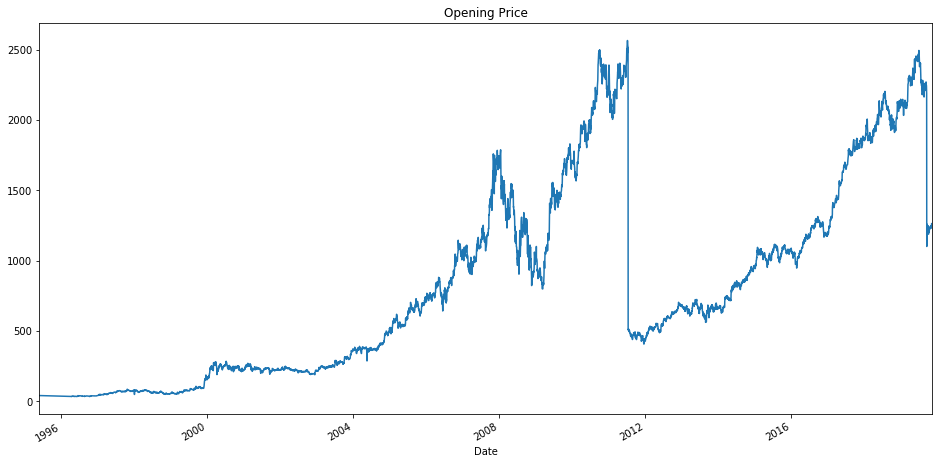

In [32]:
data['Close'].plot(label='HDFC',figsize=(16,8),title='Opening Price')

In [33]:
data= data[['Close']]
print(data.head())

            Close
Date             
1995-05-26  40.00
1995-05-29  39.25
1995-05-30  39.50
1995-05-31  40.25
1996-04-02  34.75


In [34]:
forecast_out = 30
data['Prediction'] = data[['Close']].shift(-forecast_out)
print(data.tail())

              Close  Prediction
Date                           
2019-11-06  1257.00         NaN
2019-11-07  1263.25         NaN
2019-11-08  1254.70         NaN
2019-11-11  1263.90         NaN
2019-11-13  1258.00         NaN


# Defining the Features and Labels

In [35]:
X = np.array(data.drop(['Prediction'],1))
X = X[:-forecast_out]
print(X)

[[  40.  ]
 [  39.25]
 [  39.5 ]
 ...
 [1255.05]
 [1239.7 ]
 [1242.35]]


In [36]:
y = np.array(data['Prediction'])
y = y[:-forecast_out]
print(y)

[  34.75   34.75   35.5  ... 1254.7  1263.9  1258.  ]


# Splitting the Training and Testing Datasets, and Receving the Confidence Level on the Trained Data

In [37]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [38]:
svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
svr_rbf.fit(x_train, y_train)

SVR(C=1000.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=0.1,
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [39]:
svm_confidence = svr_rbf.score(x_test, y_test)
print("svm confidence: ", svm_confidence)

svm confidence:  0.9337070955920886


In [40]:
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [41]:
lr_confidence = lr.score(x_test, y_test)
print("lr confidence: ", lr_confidence)

lr confidence:  0.9158566349408966


In [42]:
x_forecast = np.array(data.drop(['Prediction'],1))[-forecast_out:]
print(x_forecast)

[[1244.15]
 [1227.35]
 [1248.5 ]
 [1223.05]
 [1188.95]
 [1187.65]
 [1228.5 ]
 [1199.95]
 [1198.55]
 [1203.15]
 [1222.9 ]
 [1221.2 ]
 [1220.8 ]
 [1229.2 ]
 [1238.65]
 [1241.4 ]
 [1235.95]
 [1228.7 ]
 [1238.  ]
 [1242.15]
 [1248.45]
 [1229.95]
 [1240.35]
 [1236.65]
 [1239.4 ]
 [1257.  ]
 [1263.25]
 [1254.7 ]
 [1263.9 ]
 [1258.  ]]


# Final Predictions for the next 30 days using both Linear Regression and SVM

In [43]:
lr_prediction = lr.predict(x_forecast)
print(lr_prediction)
svm_prediction = svr_rbf.predict(x_forecast)
print(svm_prediction)

[1235.35469534 1219.15454293 1239.54937766 1215.00807535 1182.12562314
 1180.87203992 1220.26348193 1192.73286579 1191.38285309 1195.8186091
 1214.86343113 1213.22412999 1212.83841208 1220.93848828 1230.05107401
 1232.70288467 1227.44747809 1220.45634089 1229.4242824  1233.42610576
 1239.50116292 1221.66170937 1231.69037515 1228.12248444 1230.7742951
 1247.74588334 1253.77272575 1245.52800533 1254.39951736 1248.71017812]
[1122.64883507 1292.35318985 1305.55457337 1231.53613651 1299.53844035
 1292.65404289 1298.36307258 1204.45679794 1198.5929945  1007.43285505
 1229.35442586 1187.87190231 1178.63479246 1298.39910102 1258.21516861
 1281.66713197 1380.76898316 1298.88252949 1269.75062486 1266.64116439
 1308.01413843 1289.62514715 1273.5684278  1342.20284177 1260.64259856
 1223.11982221 1287.68646548 1181.72824848 1260.60856189 1223.21512672]
